In [1]:
# Exercise 1

x = 1 
y = 1

print('\nstandard equations yield\n')
for k in range(20):
    x, y = y*(1+x**2), 2/(1+x**2)
    print(x, y)


standard equations yield

2 1.0
5.0 0.4
10.4 0.07692307692307693
8.396923076923079 0.018321729571271525
1.310156049097899 0.0279687745347386
0.0759774241902131 0.7362390824073594
0.7404890733011719 1.988521124626821
3.0788751163466825 1.291719247766276
13.536535665652755 0.19084931029197522
35.161656645088655 0.010855535745562367
13.432011374622395 0.0016163678607467738
0.2932397270847742 0.011024207919000618
0.011972174459708588 1.841638368385246
1.8419023358662185 1.9997133751601999
8.783949400259472 0.45531076832048456
35.58607297317904 0.02558926738916367
32.431033721243125 0.001578072879767756
1.661350860079516 0.0018997466672298542
0.007143212139370495 0.5319026315232105
0.5319297721101206 1.9998979542475976


The relaxation method does not converge. Rearranging the equations

$$
\begin{align}
x = y(a+x^2) &\Rightarrow& y = \frac{x}{a+x^2}\\
y = {b\over a+x^2} &\Rightarrow& a + x^2 = {b\over y} \Rightarrow x = \sqrt{\frac{b}{y}-a}
\end{align}
$$

In [16]:
import numpy as np

x = 1 
y = 1

print('\nrearranged equations yield\n')
for k in range(20):
    y, x = x/(1+x**2), np.sqrt(2/y - 1)
    print(x, y)


rearranged equations yield

1.0 0.5
1.7320508075688772 0.5
1.7320508075688772 0.43301270189221935
1.902314945932194 0.43301270189221935
1.902314945932194 0.4118632672940252
1.9636650714924069 0.4118632672940252
1.9636650714924069 0.40438075610800917
1.9864122863201303 0.40438075610800917
1.9864122863201303 0.40163345114218674
1.9949097477571613 0.40163345114218674
1.9949097477571613 0.400611243354449
1.9980918687165672 0.400611243354449
1.9980918687165672 0.4002290339314792
1.9992845505793713 0.4002290339314792
1.9992845505793713 0.40008586211625663
1.9997317204769791 0.40008586211625663
1.9997317204769791 0.40003219469412865
1.9998993971476058 0.40003219469412865
1.9998993971476058 0.40001207250421084
1.9999622742071335 0.40001207250421084


The relaxation method converges now. The solution is, as expected:

$$x = 2 = b, y = 0.4 = \frac{2}{1+2^2}$$

## Exercise 2

Differentiating 

$$
I(\lambda) = {2\pi hc^2\lambda^{-5}\over e^{hc/\lambda k_BT}-1}
$$

with respect to $\lambda$ and setting the result to zero gives

$$
\frac{dI(\lambda)}{d\lambda} = {(e^{hc/\lambda k_BT}-1)2\pi hc^2(-5)\lambda^{-6} - 2\pi hc^2\lambda^{-5}\frac{(-hc)}{k_BT\lambda^2}e^{hc/\lambda k_BT} \over \left(e^{hc/\lambda k_BT}-1\right)^2} \equiv 0
$$

We may cancel the denominator (multiply both sides of the equation with it) and also cancel some constants and powers of $\lambda$ in the numerator. Note that this implies $\lambda\neq0$ and

$$e^{hc/\lambda k_BT}-1 \neq 0$$

or in other words $\lambda\neq\infty$, which makes sense in terms of physics. Altogether we get

$$-5e^{hc/\lambda k_BT} +5 + \lambda^{-1}\frac{hc}{k_BT}e^{hc/\lambda k_BT}=0.$$

Now we multiply both sides of the equation with $e^{-hc/\lambda k_BT}$:

$$-5 +5e^{-hc/\lambda k_BT} + \frac{hc}{\lambda k_BT}=0.$$

This is the expected equation. Now substitute $x=hc/\lambda k_BT$:

$$-5 +5e^{-x} + x=0.$$

We need to solve this equation for $x$. Then we get $\lambda = b/T$ with $b=hc/k_Bx$

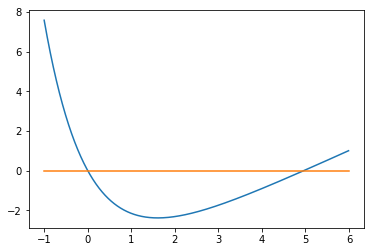

In [17]:
# before we start solving we should always get a visual representation of the equation
% matplotlib inline
import matplotlib.pyplot as plt
from numpy import exp

def f(x):
    return 5*exp(-x) + x - 5

x = np.arange(-1., 6., 0.01)

plt.figure()
plt.plot(x, f(x))
plt.plot(x, 0*x)
plt.show()

In [18]:
# the root at x = 0 is unphysical, because it corresponds to lambda = infinity
# the second root can be bracketet for example between 4 and 6

# bisection method from scipy.optimize

import scipy.optimize as opt
    
opt.bisect(f, 4, 6, xtol=2e-6)

4.965112686157227

In [19]:
# we can also implement the bisection method manually

from numpy import sign

a = 4
b = 6
counter = 0
accuracy = 1e-6

if( sign(f(a)) != sign(f(b)) ):
    while(abs(a-b) > accuracy):
        counter += 1
        midpoint = (a+b)/2
        if( sign(f(midpoint)) == sign(f(a)) ):
            a = midpoint
        else:
            b = midpoint
            
print("Bisection converged to ", (a+b)/2, " after ", counter, " iterations")

Bisection converged to  4.965114116668701  after  21  iterations


The program gives a solution of $x=4.965114$ which implies a displacement constant of $b=2.8978\cdot 10^{-3}$mK. Rearranging the Wien law gives $T=b/\lambda$. For the sun:

$$T = {b\over \lambda} = {2.8978\cdot 10^{-3}{\rm mK}\over 502{\rm nK}} = 5772K$$

This gives the surface temperature of the sun as 5772K, which is very close to the currently most accurately determined value.

## Exercise 3

The two equations are

$$
\begin{align}
f_1(V_1,V_2)\equiv{V_1-V_+\over R_1} + {V_1\over R_2}  + I_0\bigl[e^{(V_1-V_2)/V_T} - 1\bigr] &=& 0\\
f_2(V_1,V_2)\equiv{V_2-V_+\over R_3} + {V_2\over R_4}  - I_0\bigl[e^{(V_1-V_2)/V_T} - 1\bigr] &=& 0
\end{align}
$$

In fact, we could add the two equations to get rid of the nonlinear part and then solve for one of the voltages. This would reduce the problem from two equations in two variables to one equation in one variable. But instead we will practice Newton's method in two dimensions. We can use a library, or do it explicitly:

In [2]:
import numpy as np

Vplus = 5
R1 = 1000
R2 = 4000
R3 = 3000
R4 = 2000
I0 = 3e-9
VT = 0.05

accuracy = 1e-10
error = 1

# initial guess
V1 = 1
V2 = 1

# main loop
while error > accuracy:

    # equations
    Idiode = I0*(np.exp((V1 - V2)/VT) - 1)
    f1 = V1/R1 - Vplus/R1 + V1/R2 + Idiode
    f2 = V2/R3 - Vplus/R3 + V2/R4 - Idiode

    # derivatives
    Idiode1 = I0*np.exp((V1 - V2)/VT)/VT
    Idiode2 = -Idiode1
    f11 = 1/R1 + 1/R2 + Idiode1
    f12 = Idiode2
    f21 = -Idiode1
    f22 = 1/R3 +1/R4 - Idiode2
    
    # matrix notation
    Jacobian = np.array([[f11, f12],[f21, f22]])
    f = np.array([f1, f2])
    
    # Newton's method iteration
    deltaV = np.linalg.solve(Jacobian,f)
    
    # update voltages
    V1 -= deltaV[0]
    V2 -= deltaV[1]
    error = max(abs(deltaV))  # for example, other error estimates possible
    
    print('%.8g' % V1, '\t%.8g' % V2)

3.999904 	2.000144
3.9798949 	2.0301348
3.9599006 	2.0601405
3.939906 	2.090146
3.919899 	2.120139
3.899904 	2.150144
3.8799041 	2.1801441
3.859904 	2.2101439
3.839904 	2.240144
3.819904 	2.270144
3.799904 	2.300144
3.779904 	2.330144
3.759904 	2.360144
3.739904 	2.390144
3.719904 	2.420144
3.699904 	2.450144
3.6799041 	2.4801439
3.6599042 	2.5101437
3.6399045 	2.5401433
3.6199054 	2.5701419
3.5999079 	2.6001381
3.5799152 	2.6301273
3.5599358 	2.6600963
3.5399944 	2.6900085
3.52016 	2.7197601
3.5006245 	2.7490632
3.4819047 	2.777143
3.4652734 	2.8020899
3.4531861 	2.8202209
3.4478093 	2.828286
3.446972 	2.829542
3.4469546 	2.8295681
3.4469546 	2.8295681
3.4469546 	2.8295681


The code converged to $V_1 = 3.447$V and $V_2 = 2.830$V. The difference $V = V_1 - V_2 = 0.617$V, which is indeed close to 0.6V.